# Run toy EDM 

In [1]:
# Preamble and imports
import sys
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load custom style
plt.style.use('../src/utils/edm.mplstyle')

# Add the src subdirectories to Python path
project_root = Path("..").resolve()
sys.path.append(str(project_root / "src" / "core"))
sys.path.append(str(project_root / "src" / "utils"))

# Import internal modules
from simulate import Simulation
from plotting import Plotter

print("Muon EDM toy simulation framework")

print("=" * 40)
print(f"Project root: {project_root}")

# Create the spin precession simulator
simulation = Simulation()

# Create plotter
plotter = Plotter()

Muon EDM toy simulation framework
Project root: /Users/sgrant/gm2/toy-edm

--- Configuration ---
Simulation:
  physics:
    PhysicsParameters:
      c: 299792458
      e: 1.602176634e-19
      q: 1.0
      h: 6.62607015e-34
      hbar: 1.0545718176461565e-34
      m_mu: 105.6583745
      tau_mu: 2.197e-06
  muon:
    MuonParameters:
      physics:
        PhysicsParameters:
          c: 299792458
          e: 1.602176634e-19
          q: 1.0
          h: 6.62607015e-34
          hbar: 1.0545718176461565e-34
          m_mu: 105.6583745
          tau_mu: 2.197e-06
      a_mu: 0.001165920715
      a_mu_uncertainty: 1.45e-10
      a_mu_relative_uncertainty: 1.24e-07
      magic_momentum: 3.094
  precession:
    PrecessionParameters:
      physics:
        PhysicsParameters:
          c: 299792458
          e: 1.602176634e-19
          q: 1.0
          h: 6.62607015e-34
          hbar: 1.0545718176461565e-34
          m_mu: 105.6583745
          tau_mu: 2.197e-06
      muons:
        MuonPa


=== Running: No tilt ===

=== Running: EDM (1e-19 ecm) ===

=== Running: Br,n=0 (100 ppm) ===

=== Running: Bz,n=0 (100 ppm) ===

=== Running: Bz,n=1 (100 ppm) ===
	Wrote ../img/spin_3d_overlay.png


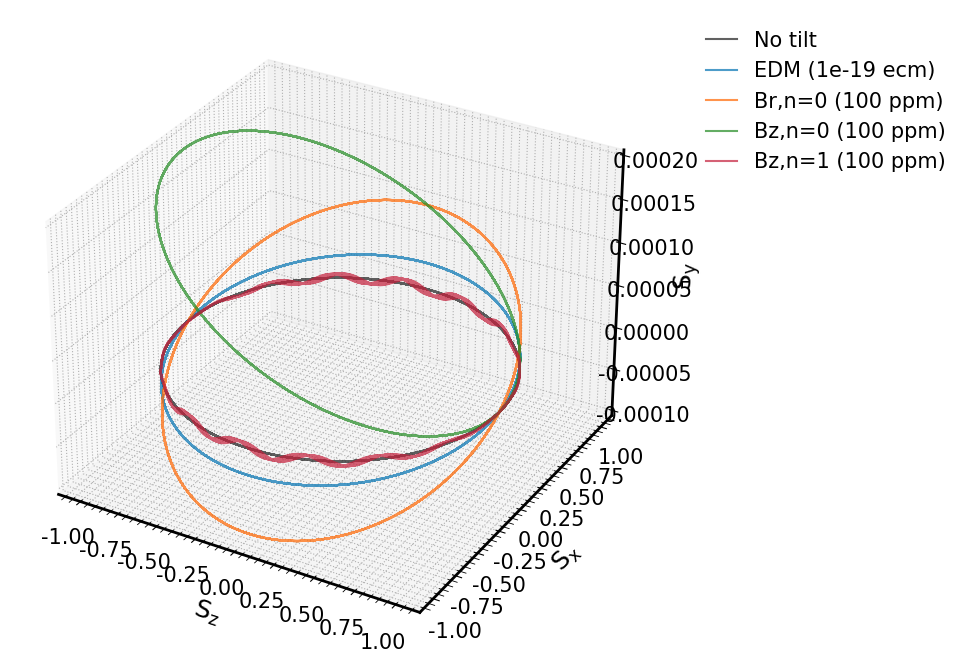

In [2]:
# Configuration dictionary for EDM simulation comparisons

time_steps = int(5e3)
configs = {
    "No tilt": {
        'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
        't_max': 50e-6,         # Total simulation time in seconds
        'time_steps': time_steps,     # Number of time steps in the simulation
        'edm_mag': 0,           # EDM magnitude in ecm 
        'backgrounds': {"Br_n0": 0.0, "Bz_n0": 0.0, "Bz_n1": 0.0} # Background field strengths in ppm
    },
    "EDM (1e-19 ecm)": {
        'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
        't_max': 50e-6,         # Total simulation time in seconds
        'time_steps': time_steps,     # Number of time steps in the simulation
        'edm_mag': 1e-19,       # EDM magnitude in ecm 
        'backgrounds': {"Br_n0": 0.0, "Bz_n0": 0.0, "Bz_n1": 0.0} # Background field strengths in ppm
    },
    "Br,n=0 (100 ppm)": {
        'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
        't_max': 50e-6,         # Total simulation time in seconds
        'time_steps': time_steps,     # Number of time steps in the simulation
        'edm_mag': 0,           # EDM magnitude in ecm 
        'backgrounds': {"Br_n0": 100.0, "Bz_n0": 0.0, "Bz_n1": 0.0}  # Background field strengths in ppm
    },
    "Bz,n=0 (100 ppm)": {
        'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
        't_max': 50e-6,         # Total simulation time in seconds
        'time_steps': time_steps,     # Number of time steps in the simulation
        'edm_mag': 0,           # EDM magnitude in ecm 
        'backgrounds': {"Br_n0": 0.0, "Bz_n0": 100.0, "Bz_n1": 0.0}  # Background field strengths in ppm
    },
    "Bz,n=1 (100 ppm)": {
        'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
        't_max': 50e-6,         # Total simulation time in seconds
        'time_steps': time_steps,     # Number of time steps in the simulation
        'edm_mag': 0,           # EDM magnitude in ecm 
        'backgrounds': {"Br_n0": 0.0, "Bz_n0": 0.0, "Bz_n1": 100.0}  # Background field strengths in ppm
    },
}

# Run all configurations
results = {}
for label, config in configs.items():
    print(f"\n=== Running: {label} ===")
    results[label] = simulation.run(**config)

plotter.spin_3d_overlay(results, out_path='../img/spin_3d_overlay.png')

## No EDM, no backgrounds

	Wrote ../img/no_edm_no_bkg/plt_spin_3d.png


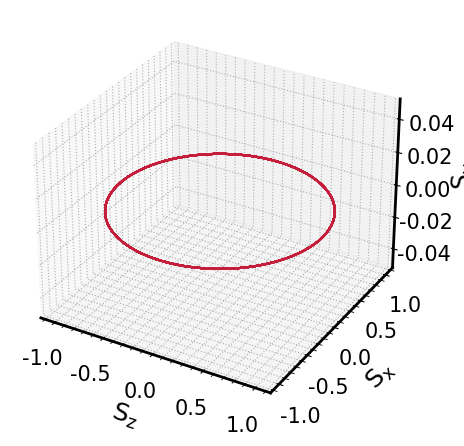

	Wrote ../img/no_edm_no_bkg/gr_1x2_wiggle_modulo.png


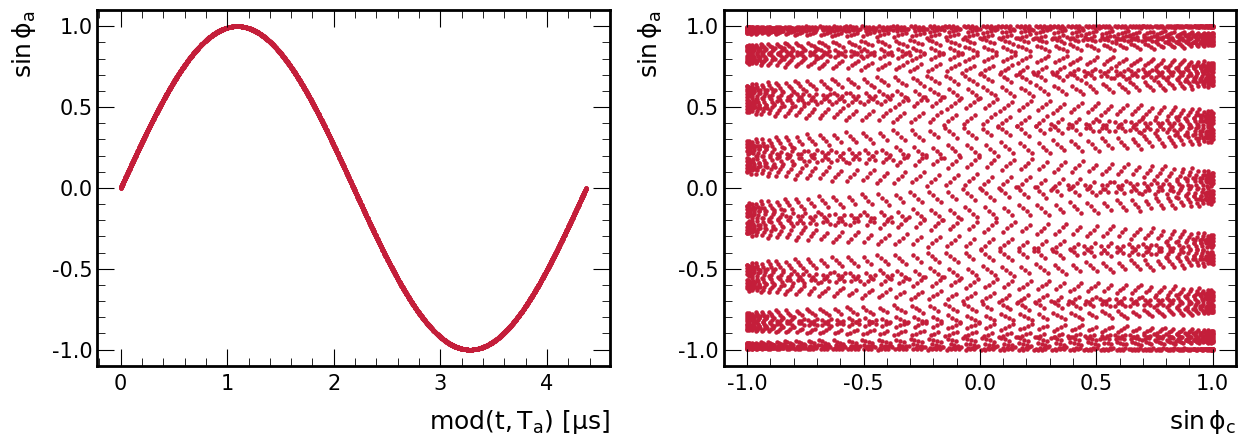

	Wrote ../img/no_edm_no_bkg/gr_sy_modulo.png


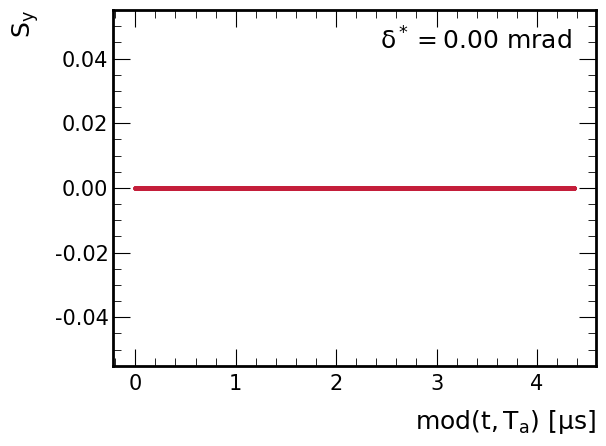

	Wrote ../img/no_edm_no_bkg/gr_3x2_spin_phase_summary.png


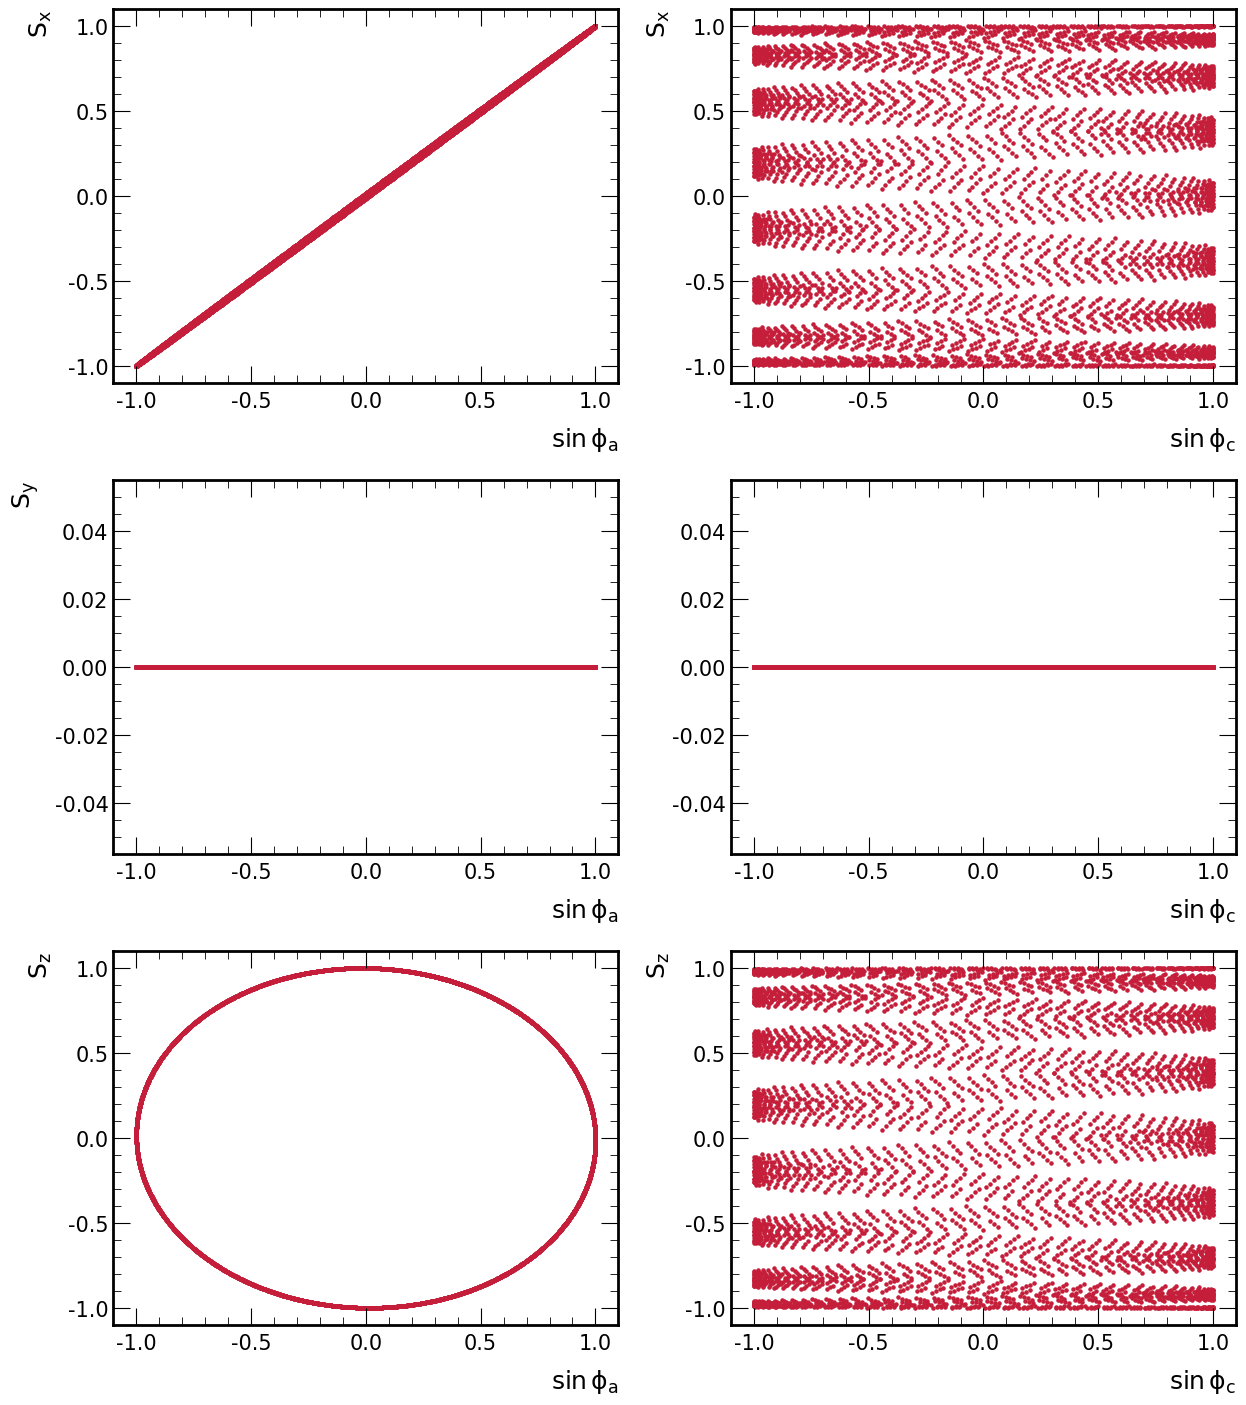

In [3]:

# Run the simulation
config = {
    'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
    't_max': 50e-6,         # Total simulation time in seconds
    'time_steps': time_steps,     # Number of time steps in the simulation
    'edm_mag': 0,       # EDM magnitude in ecm 
    'backgrounds': {"Bz_n0": 0.0, "Bz_n1": 0.0, "Br_n0": 0.0} # Background field strengths in ppm
}       
results = simulation.run(**config)

# Make plots 
dir="no_edm_no_bkg"
plotter.spin_3d(results, out_path=f'../img/{dir}/plt_spin_3d.png')
plotter.wiggle_modulo(results, out_path=f'../img/{dir}/gr_1x2_wiggle_modulo.png')
plotter.sy_modulo(results, out_path=f'../img/{dir}/gr_sy_modulo.png')
plotter.spin_phase_summary(results, out_path=f'../img/{dir}/gr_3x2_spin_phase_summary.png')


## Large EDM, no backgrounds 

	Wrote ../img/{dir}/plt_spin_3d.png


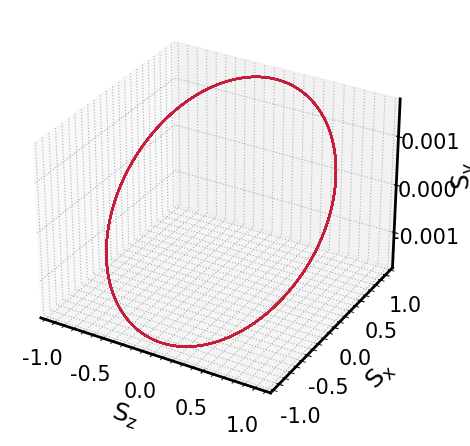

	Wrote ../img/{dir}/gr_1x2_wiggle_modulo.png


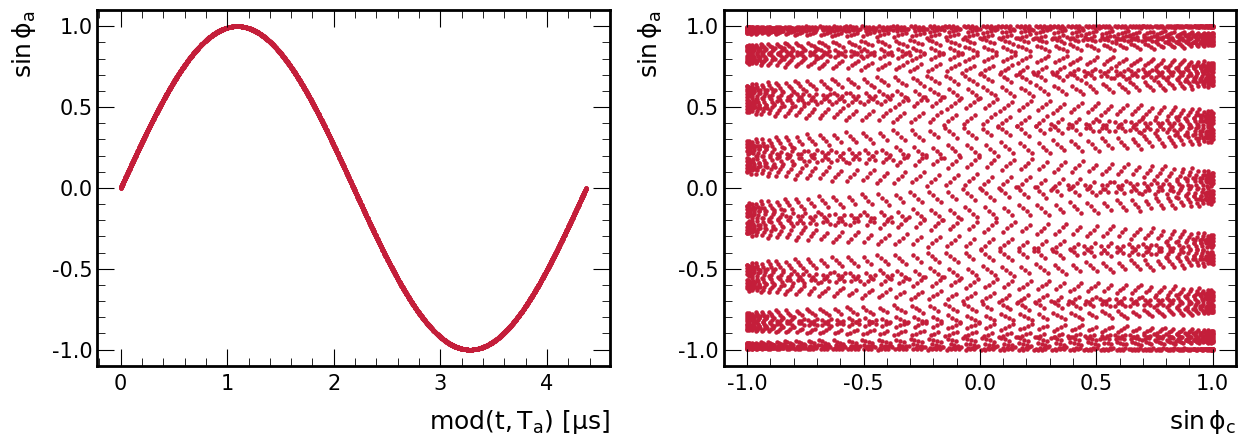

	Wrote ../img/{dir}/gr_sy_modulo.png


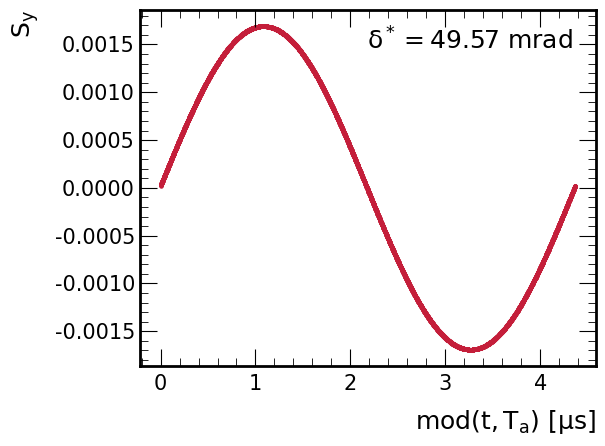

	Wrote ../img/{dir}/gr_3x2_spin_phase_summary.png


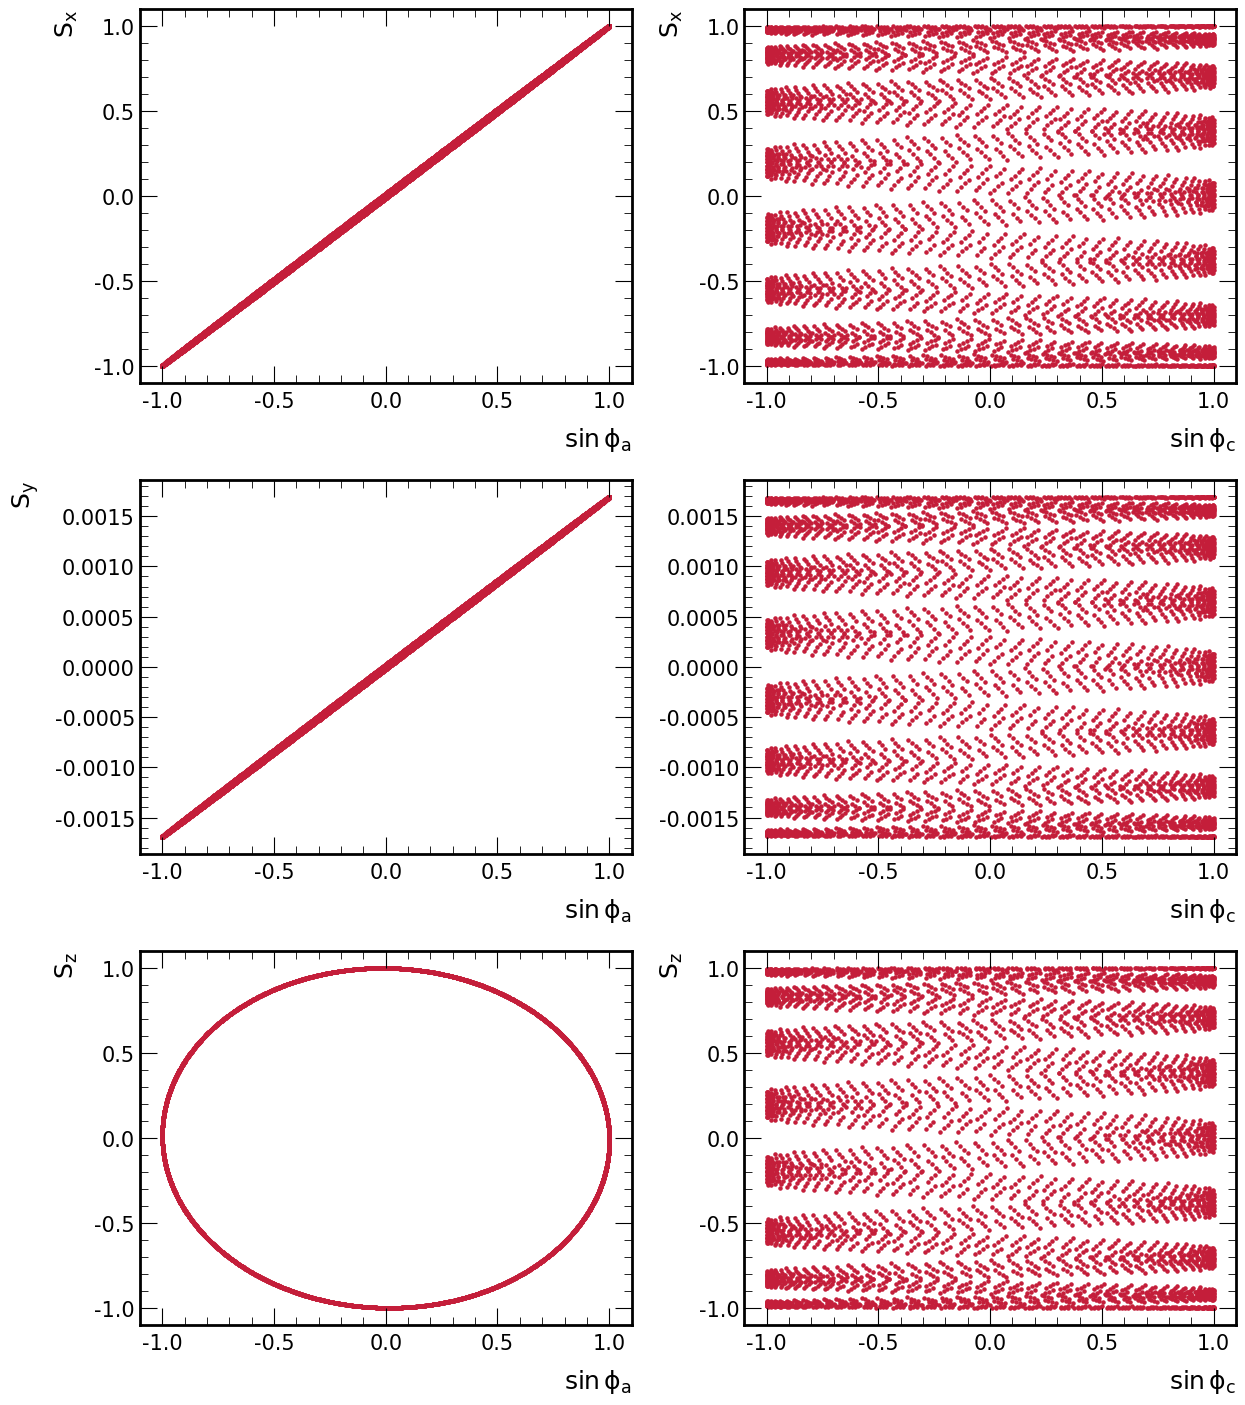

In [4]:

# Run the simulation
config = {
    'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
    't_max': 50e-6,         # Total simulation time in seconds
    'time_steps': time_steps,     # Number of time steps in the simulation
    'edm_mag': 5.4e-18,       # EDM magnitude in ecm 
    'backgrounds': {"Bz_n0": 0.0, "Bz_n1": 0.0, "Br_n0": 0.0} # Background field strengths in ppm
}       
results = simulation.run(**config)

# Make plots 
# Make plots 

dir="large_edm_no_bkg"
plotter.spin_3d(results, out_path='../img/{dir}/plt_spin_3d.png')
plotter.wiggle_modulo(results, out_path='../img/{dir}/gr_1x2_wiggle_modulo.png')
plotter.sy_modulo(results, out_path='../img/{dir}/gr_sy_modulo.png')
plotter.spin_phase_summary(results, out_path='../img/{dir}/gr_3x2_spin_phase_summary.png')


In [5]:
results["edm_tilt_lab"]

np.float64(0.001691611554770758)

## Small EDM, no backgrounds 

	Wrote ../img/{dir}/plt_spin_3d.png


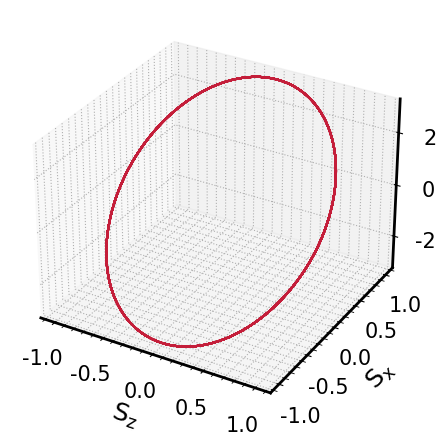

	Wrote ../img/{dir}/gr_1x2_wiggle_modulo.png


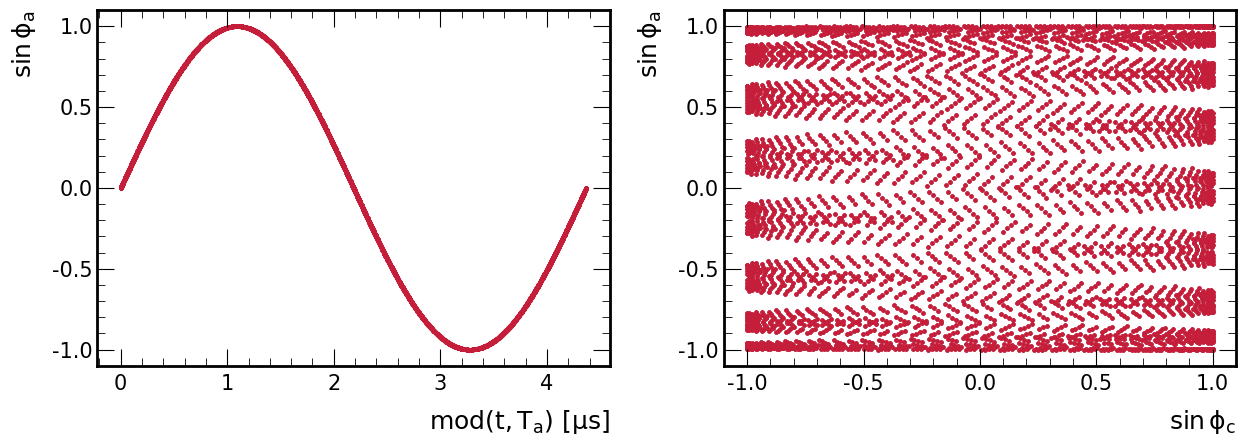

	Wrote ../img/{dir}/gr_sy_modulo.png


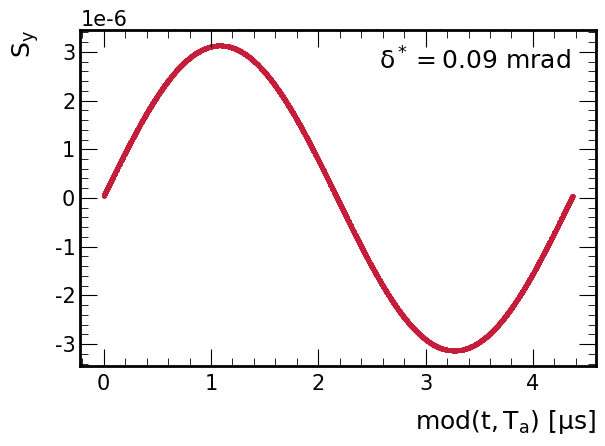

	Wrote ../img/{dir}/gr_3x2_spin_phase_summary.png


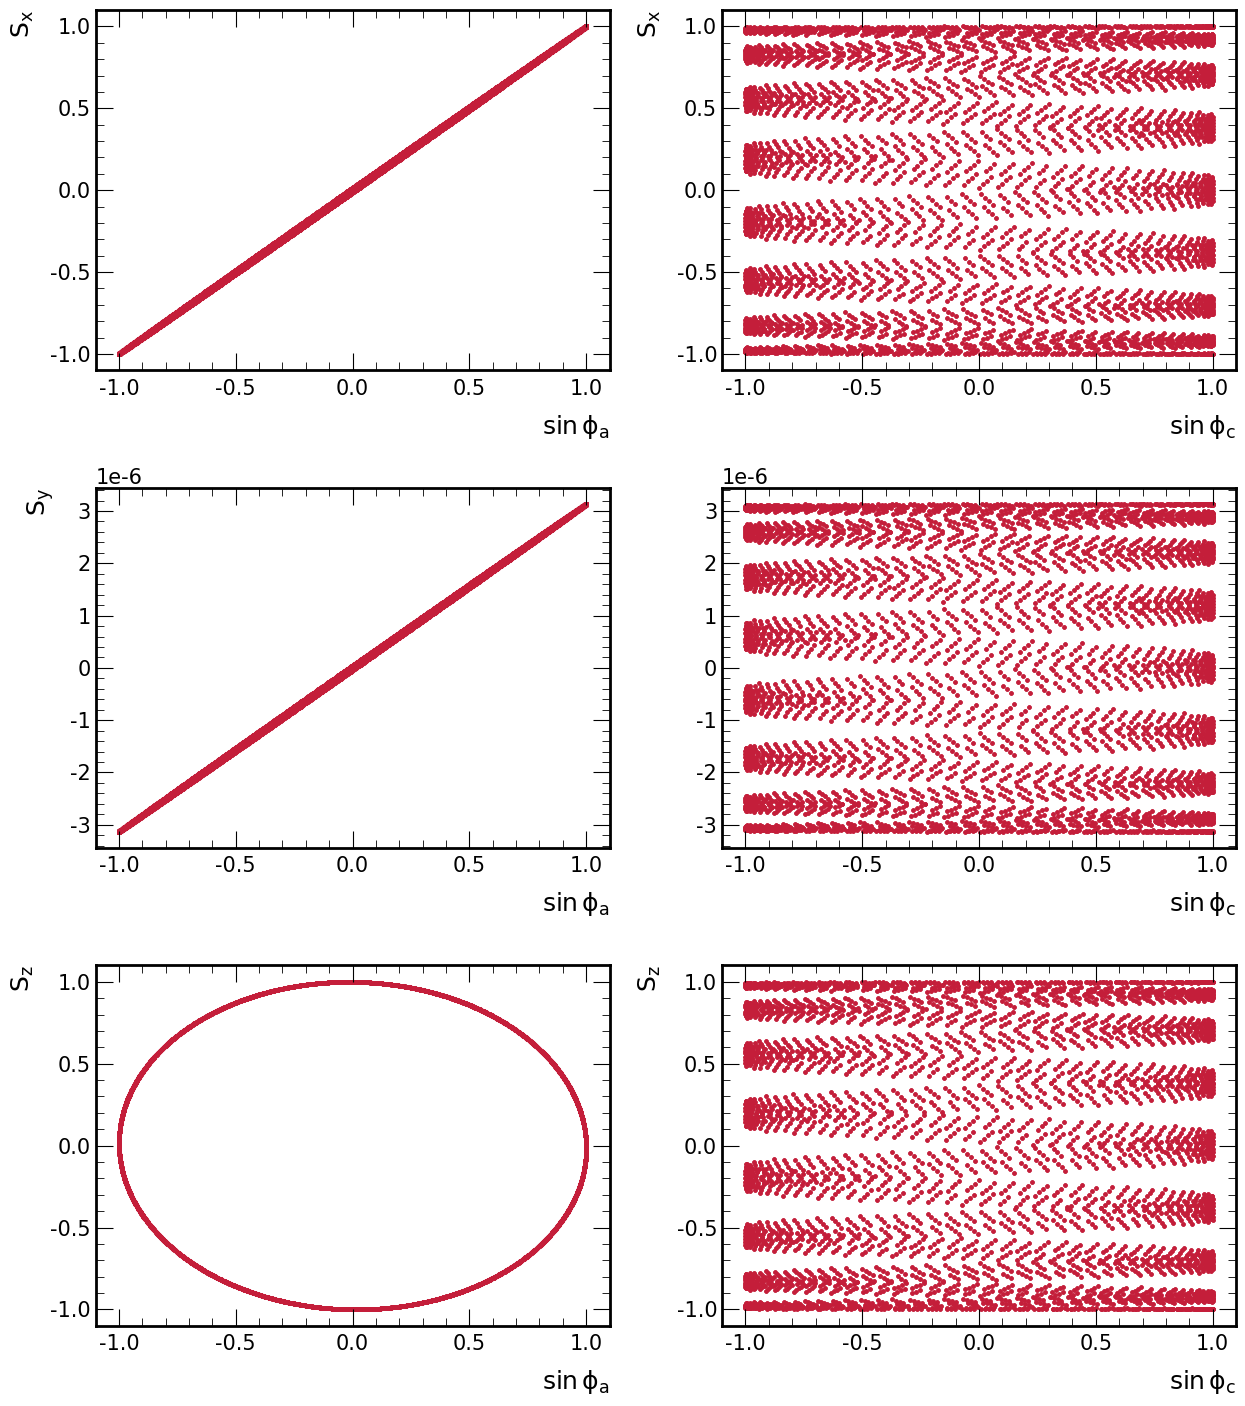

In [6]:

# Run the simulation
config = {
    'n_muons': 2,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
    't_max': 50e-6,         # Total simulation time in seconds
    'time_steps': time_steps,     # Number of time steps in the simulation
    'edm_mag': 1e-20,       # EDM magnitude in ecm 
    'backgrounds': {"Bz_n0": 0.0, "Bz_n1": 0.0, "Br_n0": 0.0} # Background field strengths in ppm
}       
results = simulation.run(**config)

# Make plots 
dir="small_edm_no_bkg"
plotter.spin_3d(results, out_path='../img/{dir}/plt_spin_3d.png')
plotter.wiggle_modulo(results, out_path='../img/{dir}/gr_1x2_wiggle_modulo.png')
plotter.sy_modulo(results, out_path='../img/{dir}/gr_sy_modulo.png')
plotter.spin_phase_summary(results, out_path='../img/{dir}/gr_3x2_spin_phase_summary.png')

## No EDM, Br (N=0) at 1 ppm

	Wrote ../img/{dir}/plt_spin_3d.png


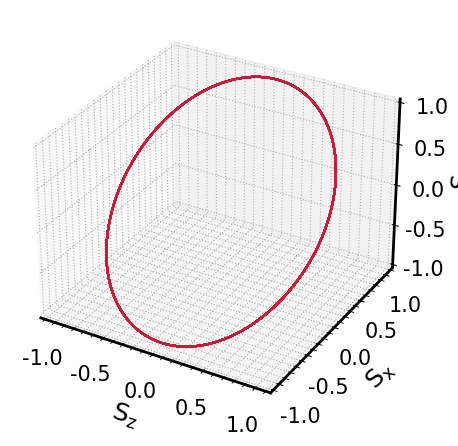

	Wrote ../img/{dir}/gr_1x2_wiggle_modulo.png


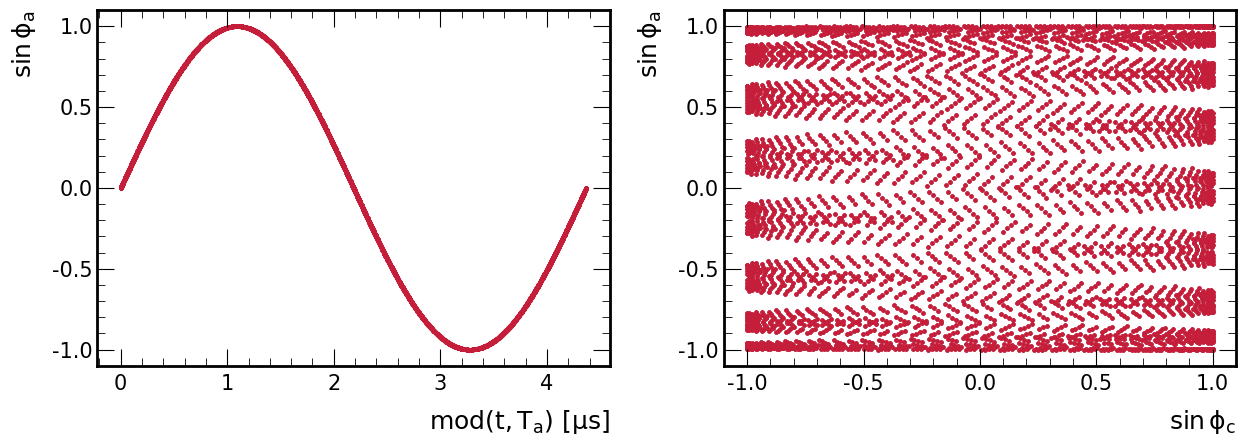

	Wrote ../img/{dir}/gr_sy_modulo.png


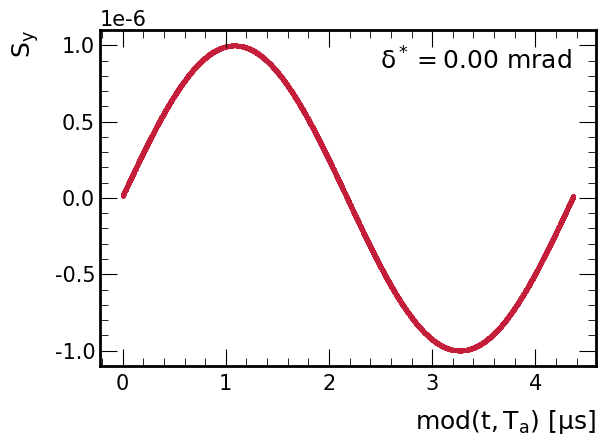

	Wrote ../img/{dir}/gr_3x2_spin_phase_summary.png


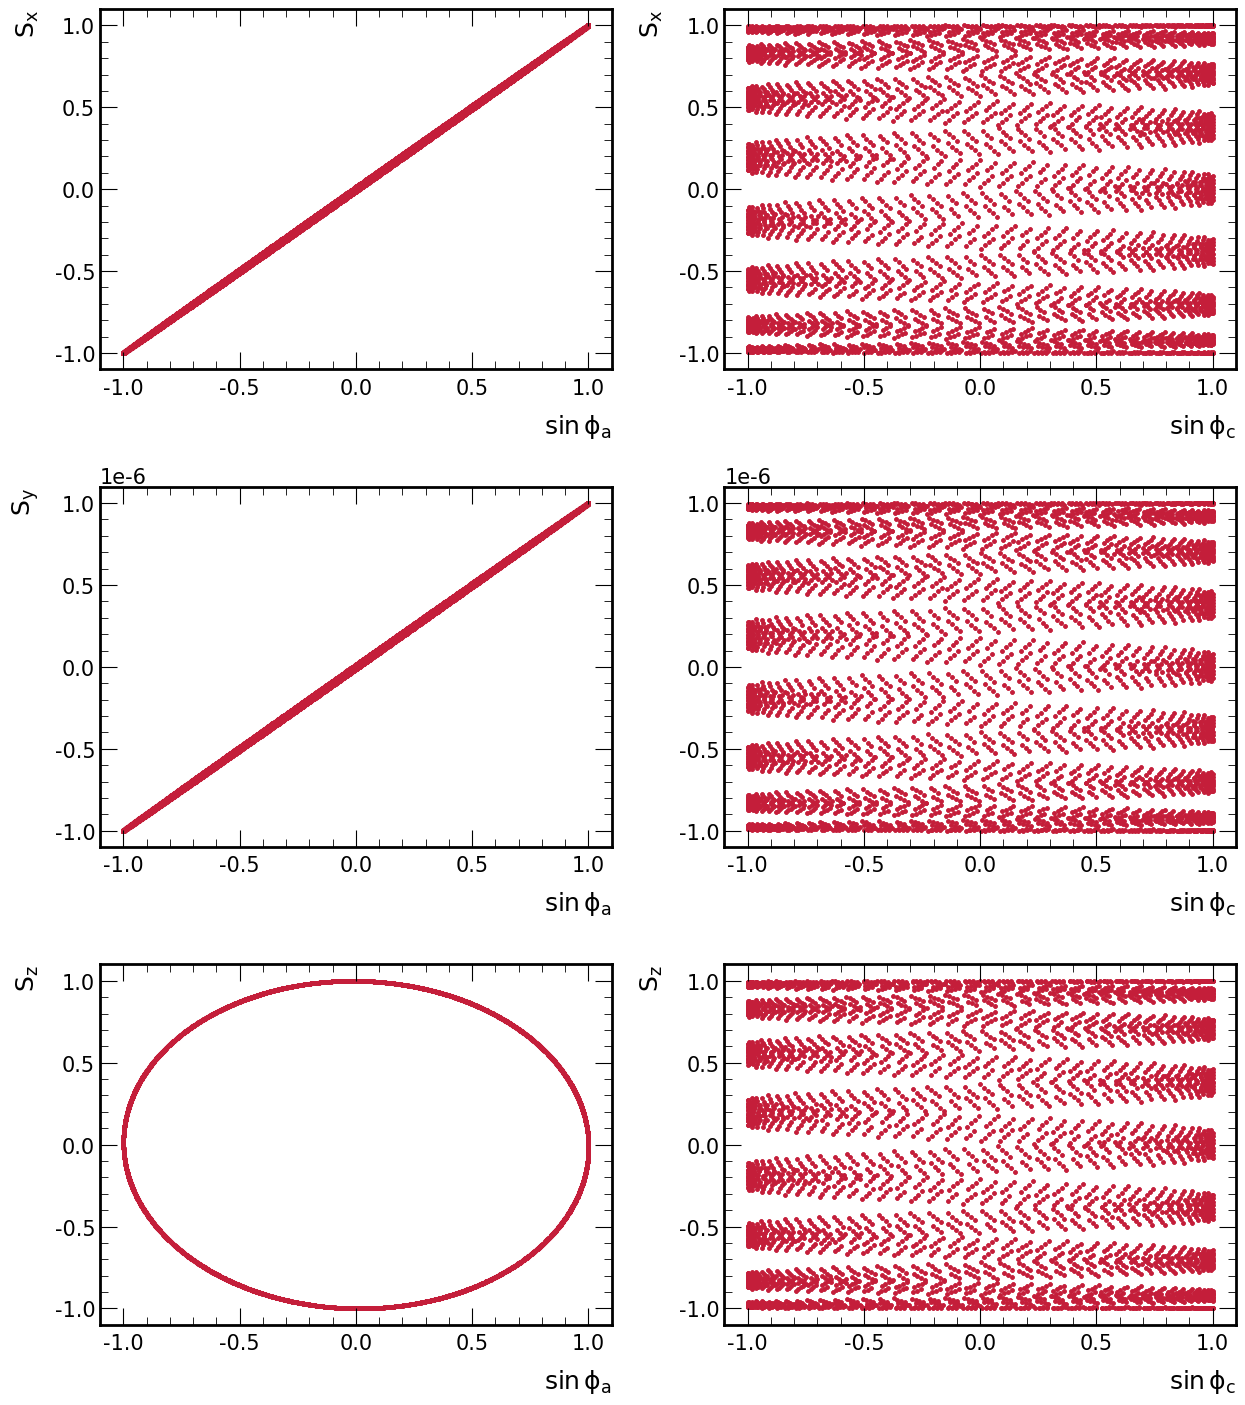

In [7]:

# Run the simulation
config = {
    'n_muons': 2,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
    't_max': 50e-6,         # Total simulation time in seconds
    'time_steps': time_steps,     # Number of time steps in the simulation
    'edm_mag': 0,       # EDM magnitude in ecm 
    'backgrounds': {"Br_n0": 1.0, "Bz_n0": 0.0, "Bz_n1": 0.0} # Background field strengths in ppm
}       
results = simulation.run(**config)

# Make plots 
dir="no_edm_Br_n0_1ppm"
plotter.spin_3d(results, out_path='../img/{dir}/plt_spin_3d.png')
plotter.wiggle_modulo(results, out_path='../img/{dir}/gr_1x2_wiggle_modulo.png')
plotter.sy_modulo(results, out_path='../img/{dir}/gr_sy_modulo.png')
plotter.spin_phase_summary(results, out_path='../img/{dir}/gr_3x2_spin_phase_summary.png')

## Small EDM, Br (N=0) at 1 ppm 

In [8]:

# # Run the simulation
# config = {
#     'n_muons': 2,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
#     't_max': 50e-6,         # Total simulation time in seconds
#     'time_steps': 1000,     # Number of time steps in the simulation
#     'edm_mag': 1e-20,       # EDM magnitude in ecm 
#     'backgrounds': {"Bz_n0": 1.0, "Bz_n1": 0.0, "Br_n0": 0.0} # Background field strengths in ppm
# }       
# results = simulation.run(**config)

# # Make plots 
# dir="small_edm_Br_n0_1ppm"
# plotter.spin_3d(results, out_path='../img/{dir}/plt_spin_3d.png')
# plotter.wiggle_modulo(results, out_path='../img/{dir}/gr_1x2_wiggle_modulo.png')
# plotter.sy_modulo(results, out_path='../img/{dir}/gr_sy_modulo.png')
# plotter.spin_phase_summary(results, out_path='../img/{dir}/gr_3x2_spin_phase_summary.png')

## No EDM, Bz (N=0) at 1 ppm 

	Wrote ../img/{dir}/plt_spin_3d.png


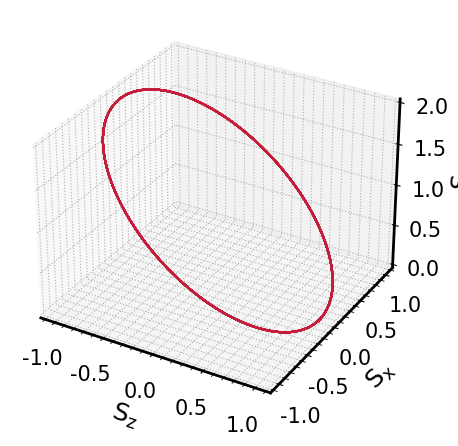

	Wrote ../img/{dir}/gr_1x2_wiggle_modulo.png


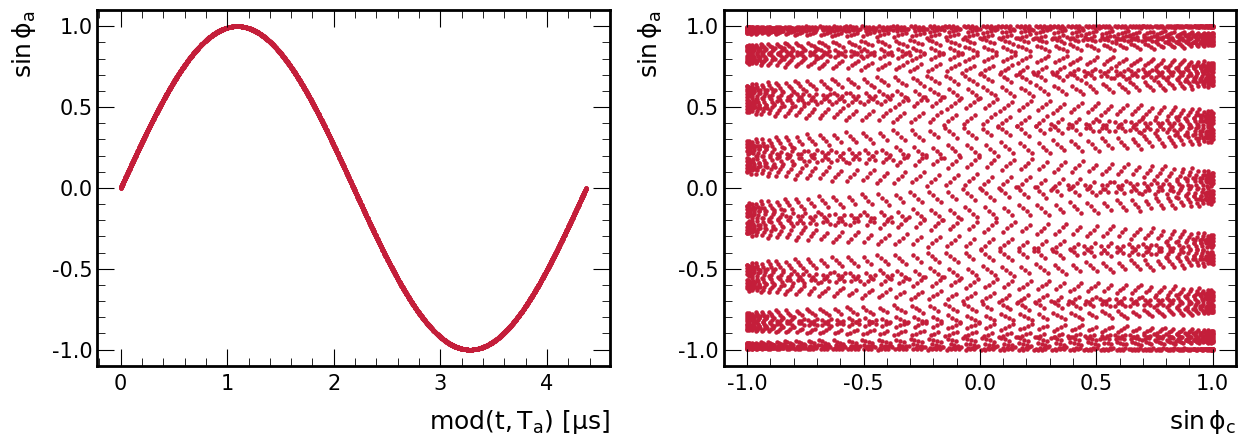

	Wrote ../img/{dir}/gr_sy_modulo.png


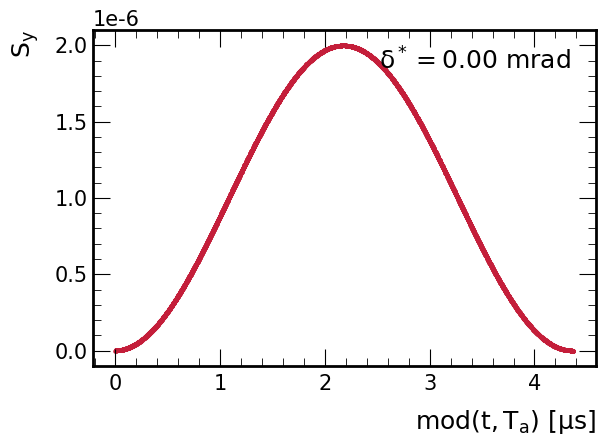

	Wrote ../img/{dir}/gr_3x2_spin_phase_summary.png


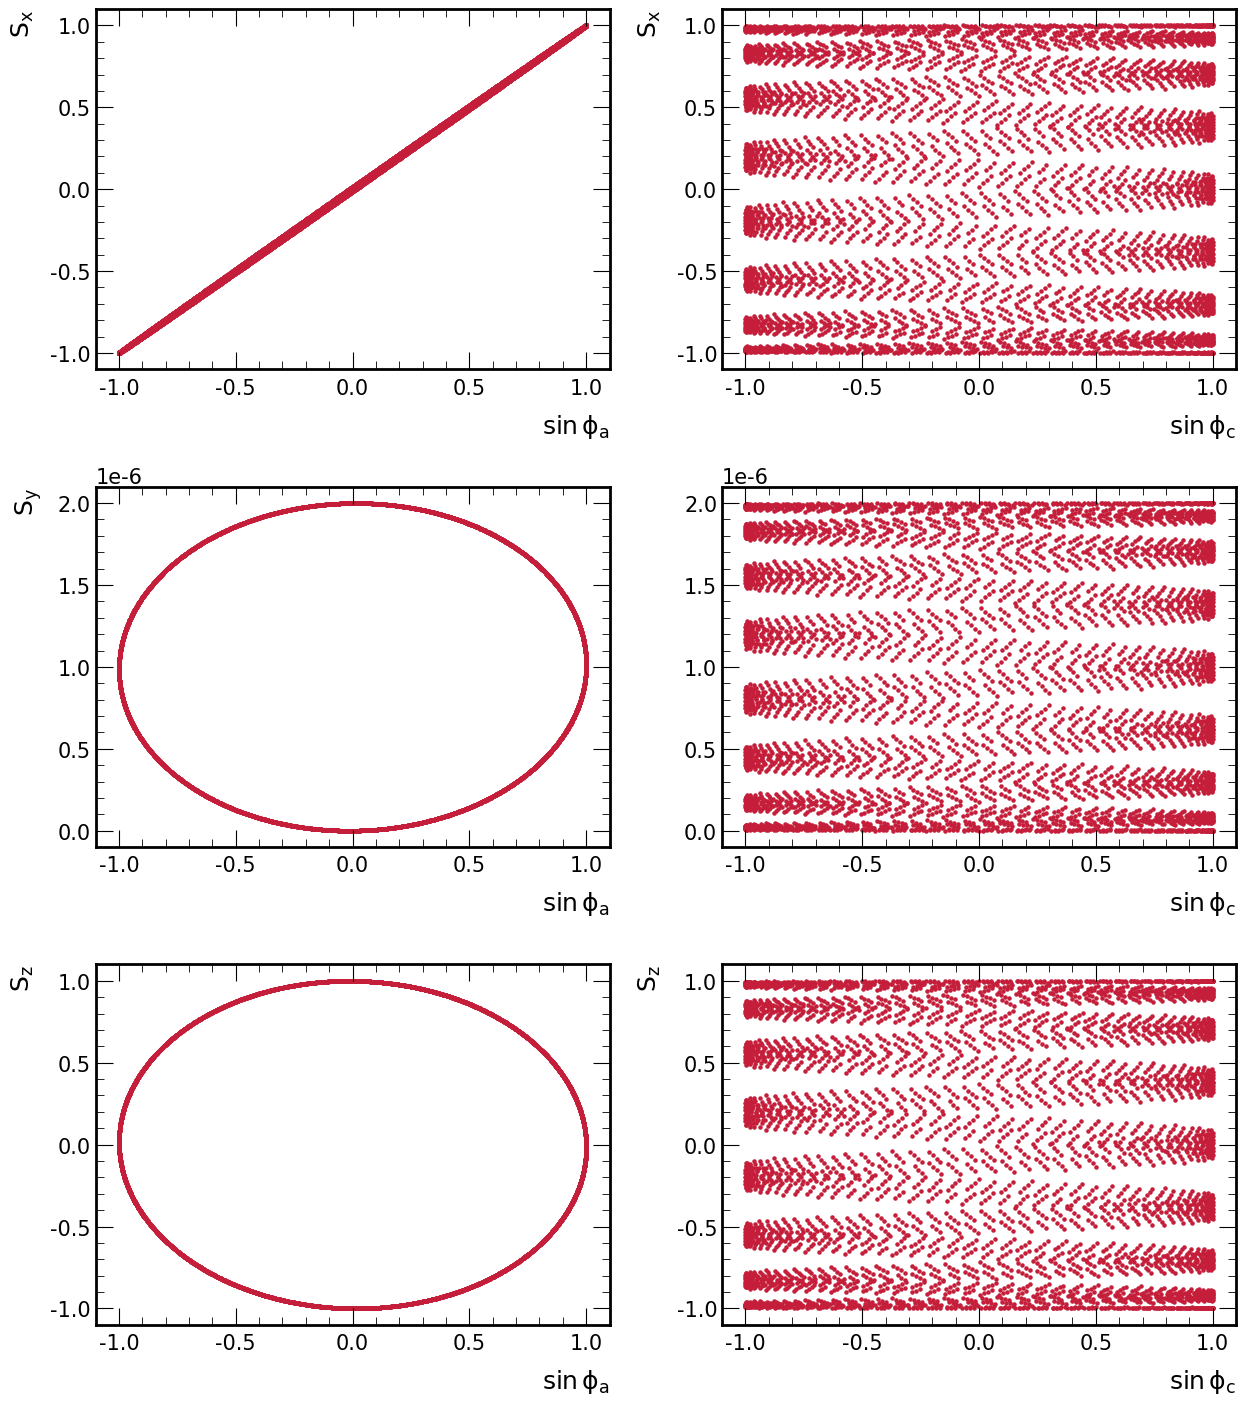

In [9]:

# Run the simulation
config = {
    'n_muons': 1,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
    't_max': 50e-6,         # Total simulation time in seconds
    'time_steps': time_steps,     # Number of time steps in the simulation
    'edm_mag': 0,           # EDM magnitude in ecm 
    'backgrounds': {"Bz_n0": 0.0, "Bz_n0": 1.0, "Br_n1": 0.0} # Background field strengths in ppm
}       
results = simulation.run(**config)

# Make plots 
dir="small_edm_Bz_n0_1ppm"
plotter.spin_3d(results, out_path='../img/{dir}/plt_spin_3d.png')
plotter.wiggle_modulo(results, out_path='../img/{dir}/gr_1x2_wiggle_modulo.png')
plotter.sy_modulo(results, out_path='../img/{dir}/gr_sy_modulo.png')
plotter.spin_phase_summary(results, out_path='../img/{dir}/gr_3x2_spin_phase_summary.png')

## No EDM, Bz (N=1) at 1 ppm 

	Wrote ../img/{dir}/plt_spin_3d.png


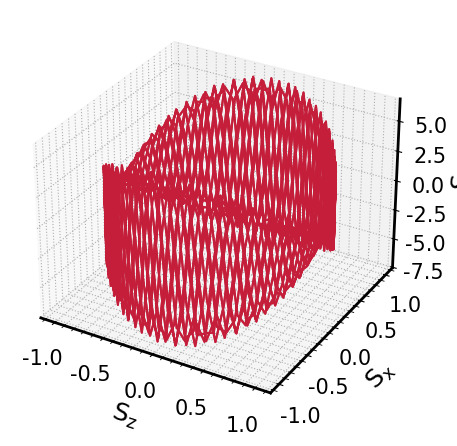

	Wrote ../img/{dir}/gr_1x2_wiggle_modulo.png


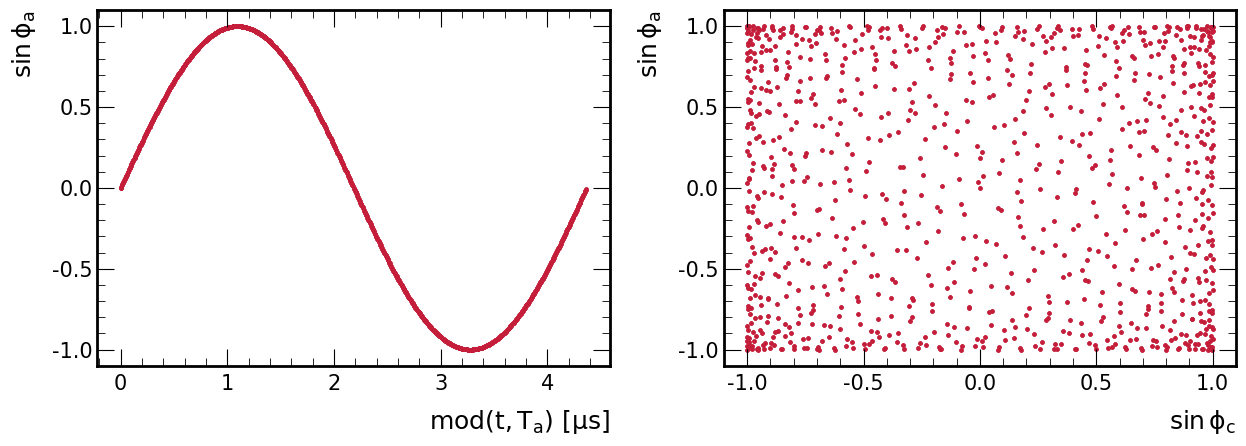

	Wrote ../img/{dir}/gr_sy_modulo.png


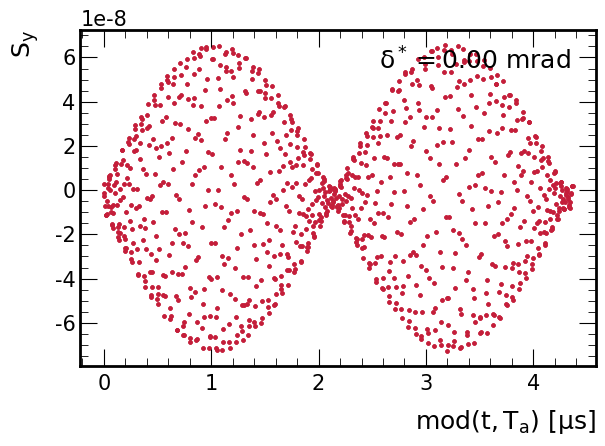

	Wrote ../img/{dir}/gr_3x2_spin_phase_summary.png


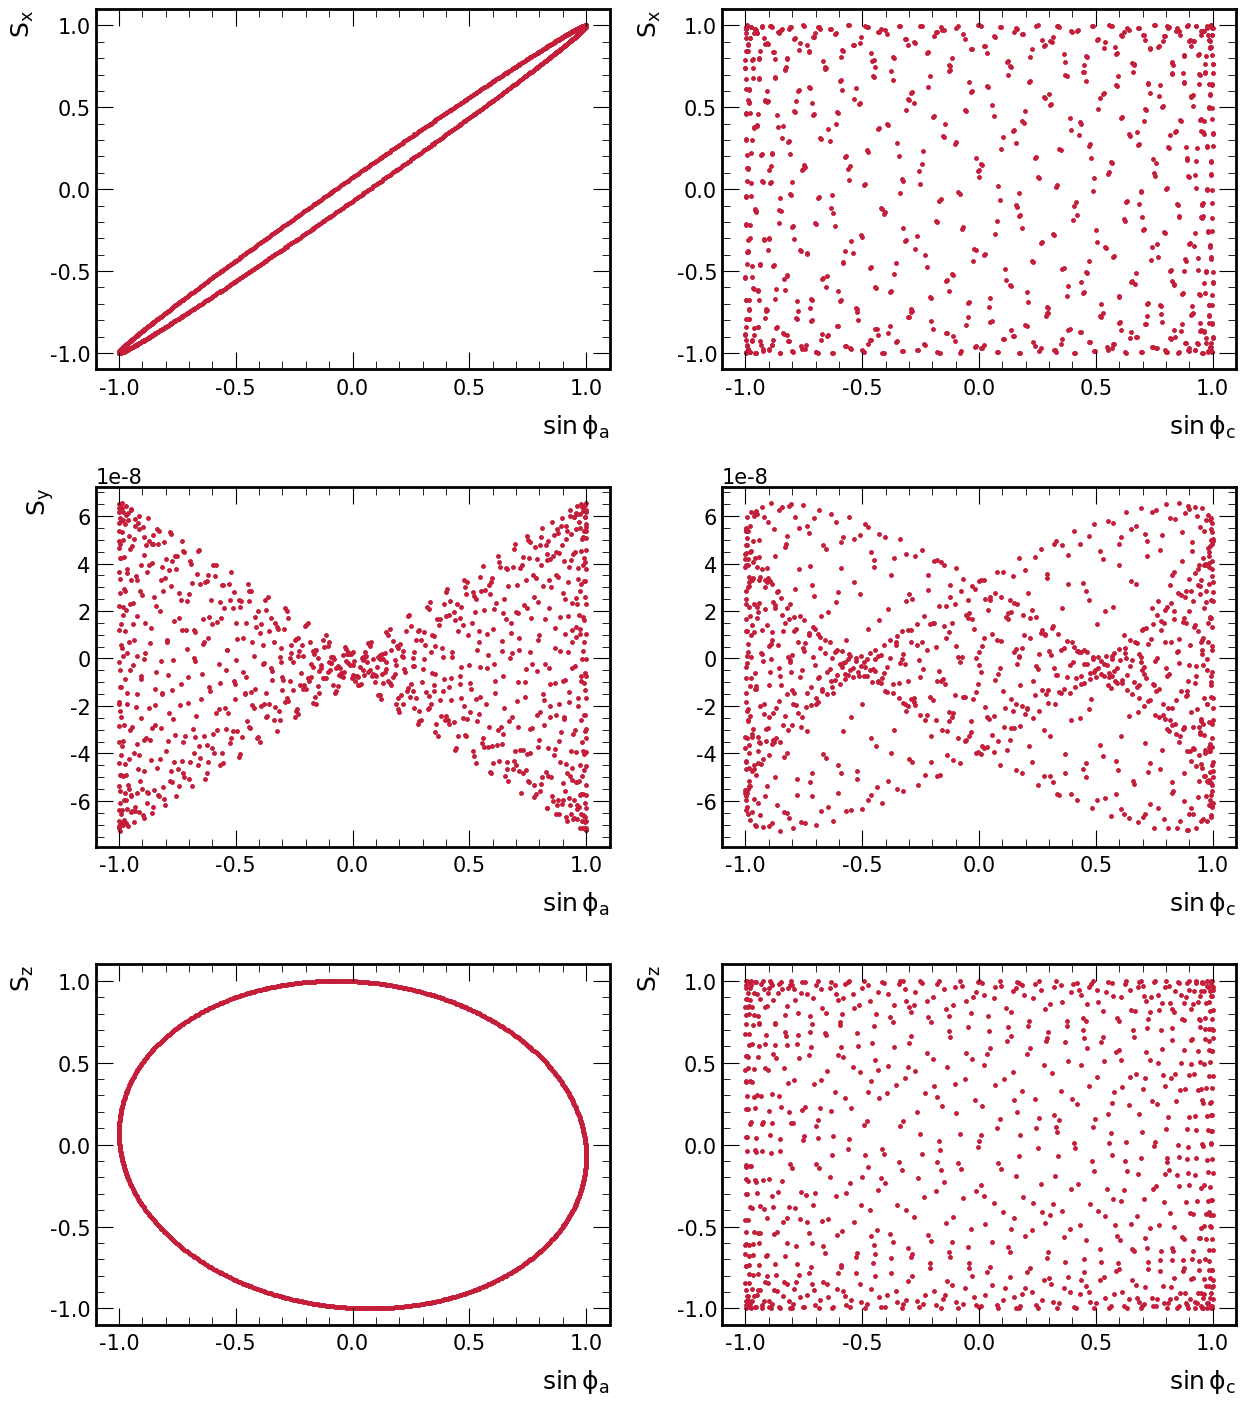

In [10]:

# Run the simulation
config = {
    'n_muons': 2,           # Number of muons to simulate (deterministic at present, one is as good as a million!)
    't_max': 50e-6,         # Total simulation time in seconds
    'time_steps': 1000,     # Number of time steps in the simulation
    'edm_mag': 0,           # EDM magnitude in ecm 
    'backgrounds': {"Bz_n0": 0.0, "Bz_n0": 0.0, "Bz_n1": 1.0} # Background field strengths in ppm
}       
results = simulation.run(**config)

# Make plots 
dir="small_edm_Bz_n1_1ppm"
plotter.spin_3d(results, out_path='../img/{dir}/plt_spin_3d.png')
plotter.wiggle_modulo(results, out_path='../img/{dir}/gr_1x2_wiggle_modulo.png')
plotter.sy_modulo(results, out_path='../img/{dir}/gr_sy_modulo.png')
plotter.spin_phase_summary(results, out_path='../img/{dir}/gr_3x2_spin_phase_summary.png')

In [11]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from pathlib import Path

# # Number of muons
# n_muons = simulation.results['n_muons']

# # Create a 3D plot
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) # figsize=(8, 6))
# # ax = fig.add_subplot(111, projection='3d')

# # Collect the data
# sin_phi_s_all = np.sin(simulation.results['phi_s'])  # sin(φ_s) for all muons
# sin_phi_c_all = np.sin(simulation.results['phi_c'])  # sin(φ_c) for all muons
# S_z_all = simulation.results['sy']  # S_z for all muons

# # Scatter plot for each muon
# for muon_index in range(n_muons):
#     ax.scatter(
#         sin_phi_c_all[:, muon_index],  # x: sin(φ_c)
#         sin_phi_s_all[:, muon_index],  # y: sin(φ_s)
#         S_z_all[:, muon_index],  # z: S_z
#         color='blue', alpha=0.6, s=5  # blue color with transparency and small marker size
#     )

# # Labels and title
# ax.set_xlabel(r'$\sin{\phi_c}$')
# ax.set_ylabel(r'$\sin{\phi_s}$')


# # import matplotlib.ticker as mticker

# ax.set_zlabel(r'$S_y$') # , labelpad=3) # , use_mathtext=True)

# # # Force scientific notation on the z-axis
# # ax.zaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
# # ax.ticklabel_format(axis='z', style='sci', scilimits=(-2, 2))

# # ax.set_box_aspect(None, zoom=1.0)


# # Adjust layout
# plt.tight_layout()

# # Save the figure
# out_path = f'../img/gr_3d_scatter_plot_{config["edm_mag"]}_ecm.png'
# # Make sure output directory exists
# out_dir = Path(out_path).parent
# out_dir.mkdir(parents=True, exist_ok=True)

# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")
# plt.show()


In [12]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from pathlib import Path

# # Number of muons
# n_muons = simulation.results['n_muons']

# # Create a 3D plot
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) # figsize=(8, 6))
# # ax = fig.add_subplot(111, projection='3d')

# # Collect the data
# sin_phi_s_all = np.cos(simulation.results['phi_s'])  # sin(φ_s) for all muons
# sin_phi_c_all = np.sin(simulation.results['phi_c'])  # sin(φ_c) for all muons
# S_z_all = simulation.results['sz']  # S_z for all muons

# # Scatter plot for each muon
# for muon_index in range(n_muons):
#     ax.scatter(
#         sin_phi_c_all[:, muon_index],  # x: sin(φ_c)
#         sin_phi_s_all[:, muon_index],  # y: sin(φ_s)
#         S_z_all[:, muon_index],  # z: S_z
#         color='blue', alpha=0.6, s=5  # blue color with transparency and small marker size
#     )

# # Labels and title
# ax.set_xlabel(r'$\sin{\phi_c}$')
# ax.set_ylabel(r'$\cos{\phi_s}$')


# # import matplotlib.ticker as mticker

# ax.set_zlabel(r'$S_z$') # , labelpad=3) # , use_mathtext=True)

# # # Force scientific notation on the z-axis
# # ax.zaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
# # ax.ticklabel_format(axis='z', style='sci', scilimits=(-2, 2))

# # ax.set_box_aspect(None, zoom=1.0)


# # Adjust layout
# plt.tight_layout()

# # Save the figure
# out_path = f'../img/gr_3d_scatter_plot_{config["edm_mag"]}_ecm.png'
# # Make sure output directory exists
# out_dir = Path(out_path).parent
# out_dir.mkdir(parents=True, exist_ok=True)

# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")
# plt.show()


In [13]:
# fig, ax = plt.subplots()

# for muon_index in range(n_muons):
#     sin_phi_s = np.sin(simulation.results['phi_s'][:, muon_index])
#     sy = simulation.results['sz'][:, muon_index]
#     ax.scatter(
#         sin_phi_s,
#         sy,
#         color='blue', s=10, alpha=0.6
#     )
# ax.set_xlabel(r'$\sin{\phi_s}$')
# ax.set_ylabel(r'$S_z$')

# plt.tight_layout()
# plt.show()

In [14]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from pathlib import Path

# # Number of muons
# n_muons = simulation.results['n_muons']

# # Create a 3D plot
# fig, ax = plt.subplots(subplot_kw={"projection": "3d"}) # figsize=(8, 6))
# # ax = fig.add_subplot(111, projection='3d')

# # Collect the data
# sin_phi_s_all = np.cos(simulation.results['phi_s'])  # sin(φ_s) for all muons
# sin_phi_c_all = np.sin(simulation.results['phi_c'])  # sin(φ_c) for all muons
# S_z_all = simulation.results['sz']  # S_z for all muons

# # Scatter plot for each muon
# for muon_index in range(n_muons):
#     ax.scatter(
#         sin_phi_c_all[:, muon_index],  # x: sin(φ_c)
#         sin_phi_s_all[:, muon_index],  # y: sin(φ_s)
#         S_z_all[:, muon_index],  # z: S_z
#         color='blue', alpha=0.6, s=5  # blue color with transparency and small marker size
#     )

# # Labels and title
# ax.set_xlabel(r'$\sin{\phi_c}$')
# ax.set_ylabel(r'$\sin{\phi_s}$')


# # import matplotlib.ticker as mticker

# ax.set_zlabel(r'$S_y$') # , labelpad=3) # , use_mathtext=True)

# # # Force scientific notation on the z-axis
# # ax.zaxis.set_major_formatter(mticker.ScalarFormatter(useMathText=True))
# # ax.ticklabel_format(axis='z', style='sci', scilimits=(-2, 2))

# # ax.set_box_aspect(None, zoom=1.0)


# # Adjust layout
# plt.tight_layout()

# # Save the figure
# out_path = f'../img/gr_3d_scatter_plot_{config["edm_mag"]}_ecm.png'
# # Make sure output directory exists
# out_dir = Path(out_path).parent
# out_dir.mkdir(parents=True, exist_ok=True)

# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")
# plt.show()


In [15]:
# fig, ax = plt.subplots() 
# for i in range(simulation.results['n_muons']):
#     ax.scatter(simulation.results['t_mod']*1e6, 
#                simulation.results['sy'][:,i]*len(simulation.results['sy'][0,:]), 
#                alpha=0.8, color='blue', s=1)
# ax.set_xlabel(r'$\text{mod}(t, T_{a})$ [$\mu$s]')
# ax.set_ylabel(r'$S_{y}$')
# # ax.set_title(r'Rest frame, $|d_{\mu}| ={config["edm_mag"]}\,e\cdot cm$')
# delta_rest_mrad = simulation.results["edm_tilt"] * config['n_muons'] 
# ax.text(0.95, 0.95, rf'$\delta^* = {delta_rest_mrad:.3f}$ mrad', 
#         transform=ax.transAxes, 
#         verticalalignment='top', horizontalalignment='right')

# plt.tight_layout()
# out_path=f'../img/gr_sy_tmod_rest_{config["edm_mag"]}_ecm.png'
# # mkdir if it doesn't exist
# out_dir = Path(out_path).parent
# out_dir.mkdir(parents=True, exist_ok=True)

# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")
# plt.show()

In [16]:
# import numpy as np
# import matplotlib.pyplot as plt
# from mpl_toolkits.mplot3d import Axes3D
# from matplotlib.ticker import ScalarFormatter

# # Unit sphere mesh
# u = np.linspace(0, 2 * np.pi, 20)
# v = np.linspace(0, np.pi, 20)
# sphere_x = np.outer(np.cos(u), np.sin(v))
# sphere_y = np.outer(np.sin(u), np.sin(v))
# sphere_z = np.outer(np.ones(np.size(u)), np.cos(v))

# # Two 3D subplots side by side
# fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(2*6.4, 4.8))
# # fig, ax = plt.subplots(1, 2, subplot_kw={"projection": "3d"}, figsize=(14, 5))  # Increase width from 12 to 14


# # --- Left panel: spin trajectories only ---
# for i in range(simulation.results['n_muons']):
#     ax[0].plot(
#         simulation.results['sx'][:, i], 
#         simulation.results['sz'][:, i], 
#         simulation.results['sy'][:, i], 
#         alpha=0.3, color='blue', linewidth=1
#     )

# ax[0].set_xlabel(r'$S_{x}$') # , labelpad=10)
# ax[0].set_ylabel(r'$S_{z}$') # , labelpad=10)
# ax[0].set_zlabel(r'$S_{y}$') # , labelpad=15)
# # ax[0].zaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# # ax[0].set_title("Spin trajectories")

# # --- Right panel: sphere + trajectories ---
# ax[1].plot_wireframe(sphere_x, sphere_y, sphere_z, alpha=0.3, color='gray')

# for i in range(simulation.results['n_muons']):
#     ax[1].plot(
#         simulation.results['sx'][:, i], 
#         simulation.results['sz'][:, i], 
#         simulation.results['sy'][:, i], 
#         alpha=0.3, color='blue', linewidth=1
#     )

# ax[1].set_xlabel(r'$S_{x}$') # , labelpad=10)
# ax[1].set_ylabel(r'$S_{z}$') # , labelpad=10)
# ax[1].set_zlabel(r'$S_{y}$') # , labelpad=10)
# # ax[0].zaxis.set_major_formatter(ScalarFormatter(useMathText=True))
# # ax[1].set_title("Spin trajectories on unit sphere")

# plt.tight_layout()
# out_path=f'../img/1x2_3d_spin_traj_{config["edm_mag"]}_ecm.png'
# # mkdir if it doesn't exist
# out_dir = Path(out_path).parent
# out_dir.mkdir(parents=True, exist_ok=True)
# plt.savefig(out_path, dpi=300)
# print(f"Wrote {out_path}")
# plt.show()
